In [24]:
import pandas as pd
import re

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 

In [5]:
data = pd.read_csv('C:\\Users\\PCLP\\OneDrive\\Desktop\\Assignment\\data\\instagram_reach.csv')

In [6]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [10]:
data.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [11]:
data

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...
95,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [12]:
"""import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

nltk.data.path.append("C:\\Users\\PCLP\\AppData\\Roaming\\nltk_data")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#C:\Users\PCLP\AppData\Roaming\nltk_data

stop_words = stopwords.words('english')"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 302-303: truncated \UXXXXXXXX escape (157960130.py, line 14)

In [13]:
data.shape

(100, 7)

In [14]:
data.isna().sum()

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [17]:
data[data['Caption'].isna()]

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
52,21,opensourcedworkplace,NaN,348,#HR #workplace#officedesign #iot #bigdata #off...,4 hours,17
67,17,remi_ole,NaN,2175,#entrepreneur #entrepreneurial#entrepreneurmin...,2 hours,41
72,25,kamalalshehabi,NaN,955,#qoute #success#motivation #entrepreneur #insp...,2 hours,20
79,11,anandvanjape,NaN,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29
85,23,monde_informatique,NaN,2455,monde_informatique#client #project#product #pr...,3 hours,24
89,12,inmemovement,NaN,1196,#INME #inmemovement#indianeedsmoreentrepreneur...,2 hours,16


In [19]:
data[data.duplicated()]

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes


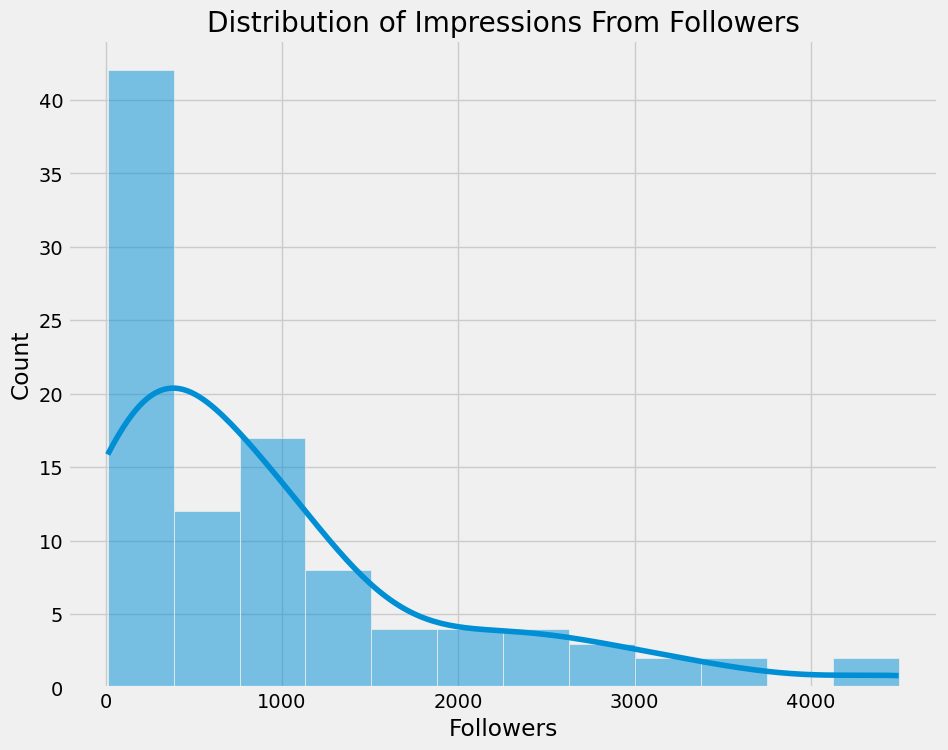

In [22]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.histplot(data['Followers'],kde=True)
plt.show()

In [23]:
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [25]:
data['Time since posted'] = data['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [42]:
def clean_hashtags(hashtag_string):
    cleaned_hashtags = [hashtag.strip('#. ') for hashtag in hashtag_string.split()]
    return ' '.join(cleaned_hashtags)

data['Cleaned_Hashtags'] = data['Hashtags'].apply(clean_hashtags)

In [44]:
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Cleaned_Hashtags
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,MachineLearning AI DataAnalytics DataScienc Da...
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,deck mac macintosh#sayhello apple stevejobs ai...
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25,whoiswho aitrading ai aitradingteam#instateam ...
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49,iot cre#workplace CDO bigdata technology#tech ...
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30,instamachinelearning instabigdata#instamarketi...


In [52]:
for words in data['Cleaned_Hashtags']:
    a = words.split("#")
    print(a)
    for i in a 
    

['MachineLearning AI DataAnalytics DataScienc DataLake']
['deck mac macintosh', 'sayhello apple stevejobs ai evolution', 'artificialintelligence machinelearning', 'terminator illbeback technology', 'computerevolution computerscience', 'sciencefiction', 'computersciencetosciencefiction', 'tomorrowstechnology vr ar robot', 'robots t2 businessdeck businessslides', 'illustration sketches drawing']
['whoiswho aitrading ai aitradingteam', 'instateam instapeople ai trading', 'artificialintelligence crypto', 'cryptocurrency blockchain tradingforex', 'forex fiatmoney coins machinelearning', 'userexperience instamachinelearning', 'instabigdata instamarketing', 'artificialintelligence deeplearning', 'datascience industry marketing', 'bigdata datascience machinelearning', 'ml']
['iot cre', 'workplace CDO bigdata technology', 'tech work computerscience blockchain', 'softwaredeveloper machinelearning', 'smartcity artificialintelligence', 'futureofwork opensource cybersecurity', 'ai softwareengineer 

In [53]:
def count_words(hashtag_string):
    return len(hashtag_string.split())

data['Word_Count'] = data['Cleaned_Hashtags'].apply(count_words)

In [54]:
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Cleaned_Hashtags,Word_Count
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,MachineLearning AI DataAnalytics DataScienc Da...,5
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,deck mac macintosh#sayhello apple stevejobs ai...,19
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25,whoiswho aitrading ai aitradingteam#instateam ...,20
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49,iot cre#workplace CDO bigdata technology#tech ...,20
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30,instamachinelearning instabigdata#instamarketi...,18


In [56]:
featureVector = np.array(data[['Followers', 'Time since posted','Word_Count']], dtype = 'float32')
targets = np.array(data['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [65]:
X = data[['Followers', 'Time since posted','Word_Count']]
y = data[['Likes']]

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train.shape

(90, 3)

In [71]:
X_test.shape

(10, 3)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
regression = LinearRegression()

In [76]:
model=regression.fit(X_train,y_train)

In [77]:
model

LinearRegression()

In [79]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    r2_square =  r2_score(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))

    return mse,mae,r2_square,rmse

In [81]:
y_pred=model.predict(X_test)

In [83]:
mse,mae,r2_square,rmse=evaluate_model(y_test,y_pred)

In [84]:
mse

555.901166470634

In [86]:
r2_square*100

73.81776721596486